In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # Use only one feature for simplicity
y = diabetes.target

In [3]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

In [4]:
# Initialize parameters
theta_0 = 0
theta_1 = 0
alpha = 0.01  # Learning rate
num_iterations = 1000

In [5]:
# Cost function
def compute_cost(X, y, theta_0, theta_1):
    m = len(y)
    cost = np.sum((theta_0 + theta_1 * X - y) ** 2) / (2 * m)
    return cost

In [6]:
# Gradient Descent
def gradient_descent(X, y, theta_0, theta_1, alpha, num_iterations):
    m = len(y)
    cost_history = []
    
    for _ in range(num_iterations):
        predictions = theta_0 + theta_1 * X
        errors = predictions - y
        theta_0 -= alpha * np.sum(errors) / m
        theta_1 -= alpha * np.sum(errors * X) / m
        cost_history.append(compute_cost(X, y, theta_0, theta_1))
    
    return theta_0, theta_1, cost_history

In [7]:
# Gradient Descent with Momentum
def gradient_descent_momentum(X, y, theta_0, theta_1, alpha, num_iterations, beta=0.9):
    m = len(y)
    cost_history = []
    v_0, v_1 = 0, 0
    
    for _ in range(num_iterations):
        predictions = theta_0 + theta_1 * X
        errors = predictions - y
        grad_0 = np.sum(errors) / m
        grad_1 = np.sum(errors * X) / m
        
        v_0 = beta * v_0 + (1 - beta) * grad_0
        v_1 = beta * v_1 + (1 - beta) * grad_1
        
        theta_0 -= alpha * v_0
        theta_1 -= alpha * v_1
        cost_history.append(compute_cost(X, y, theta_0, theta_1))
    
    return theta_0, theta_1, cost_history

In [8]:
# Perform gradient descent
theta_0_gd, theta_1_gd, cost_history_gd = gradient_descent(X_train, y_train, theta_0, theta_1, alpha, num_iterations)

/Users/prajwal/Developer/Prep/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/wb/l2mw28t51y3d4yn7d7r5hr9w0000gn/T/ipykernel_49114/4086557894.py:4: RuntimeWarning: overflow encountered in square
  cost = np.sum((theta_0 + theta_1 * X - y) ** 2) / (2 * m)
/var/folders/wb/l2mw28t51y3d4yn7d7r5hr9w0000gn/T/ipykernel_49114/3593100500.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  theta_0 -= alpha * np.sum(errors) / m
/Users/prajwal/Developer/Prep/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [9]:
# Perform gradient descent with momentum
theta_0_momentum, theta_1_momentum, cost_history_momentum = gradient_descent_momentum(X_train, y_train, theta_0, theta_1, alpha, num_iterations)

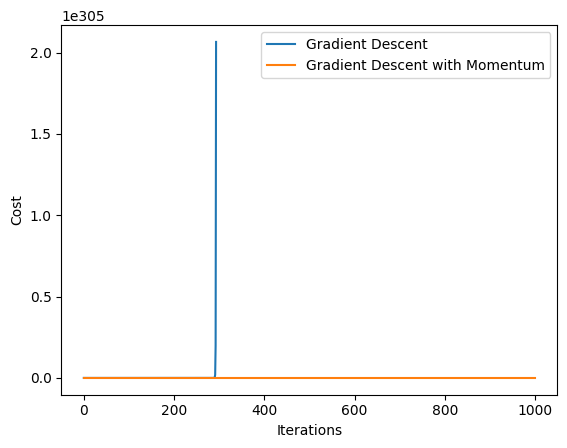

In [10]:
# Plot the cost function history
plt.plot(range(num_iterations), cost_history_gd, label='Gradient Descent')
plt.plot(range(num_iterations), cost_history_momentum, label='Gradient Descent with Momentum')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

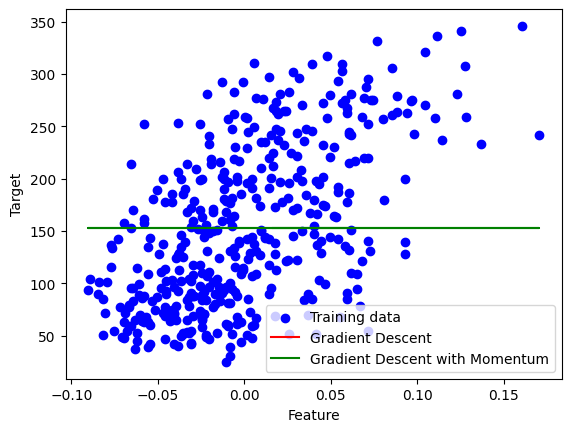

In [11]:
# Plot the regression lines
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, theta_0_gd + theta_1_gd * X_train, color='red', label='Gradient Descent')
plt.plot(X_train, theta_0_momentum + theta_1_momentum * X_train, color='green', label='Gradient Descent with Momentum')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [12]:
# Predict on the test set
y_pred_gd = theta_0_gd + theta_1_gd * X_test
y_pred_momentum = theta_0_momentum + theta_1_momentum * X_test

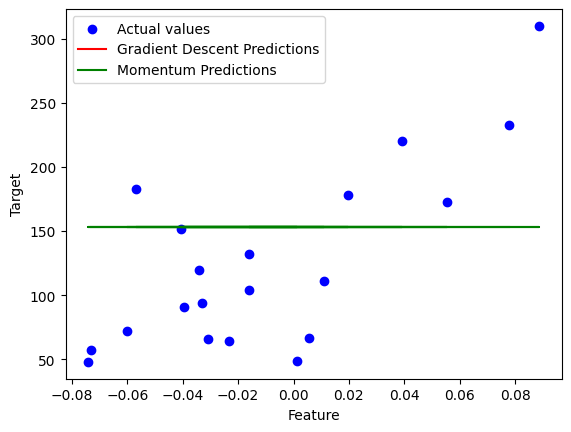

In [13]:
# Plot the test predictions
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred_gd, color='red', label='Gradient Descent Predictions')
plt.plot(X_test, y_pred_momentum, color='green', label='Momentum Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Adding nose to the data set

In [14]:
# Create a synthetic dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # Quadratic relationship with noise

In [15]:
# Add a column of ones to X to account for theta_0 (intercept)
X_b = np.c_[np.ones((100, 1)), X]

In [16]:
# Initialize parameters
theta = np.random.randn(2, 1)
alpha = 0.1  # Learning rate
num_iterations = 200

In [17]:
# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1/(2*m)) * np.sum((X.dot(theta) - y) ** 2)
    return cost

In [18]:
# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

In [19]:
# Gradient Descent with Momentum
def gradient_descent_momentum(X, y, theta, alpha, num_iterations, beta=0.9):
    m = len(y)
    cost_history = []
    v = np.zeros_like(theta)
    
    for _ in range(num_iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        v = beta * v + (1 - beta) * gradients
        theta -= alpha * v
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

In [20]:
# Perform gradient descent
theta_gd, cost_history_gd = gradient_descent(X_b, y, theta, alpha, num_iterations)

In [21]:
# Perform gradient descent with momentum
theta_momentum, cost_history_momentum = gradient_descent_momentum(X_b, y, theta, alpha, num_iterations)

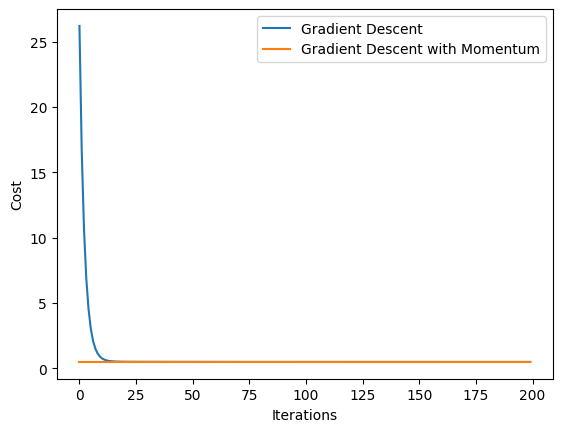

In [22]:
# Plot the cost function history
plt.plot(range(num_iterations), cost_history_gd, label='Gradient Descent')
plt.plot(range(num_iterations), cost_history_momentum, label='Gradient Descent with Momentum')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

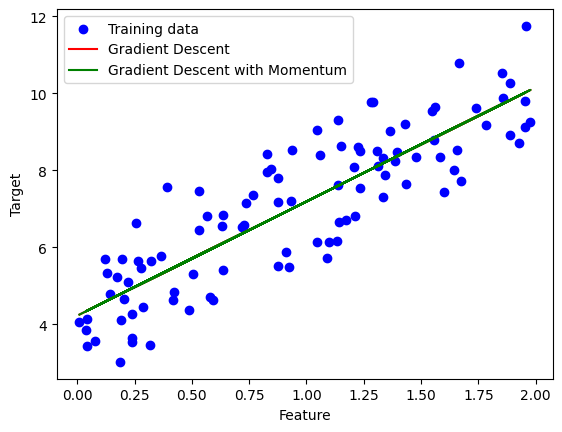

In [23]:
# Plot the regression lines
plt.scatter(X, y, color='blue', label='Training data')
plt.plot(X, X_b.dot(theta_gd), color='red', label='Gradient Descent')
plt.plot(X, X_b.dot(theta_momentum), color='green', label='Gradient Descent with Momentum')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()